In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
df= pd.read_pickle('CarPricesData.pkl')


In [5]:
df.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750


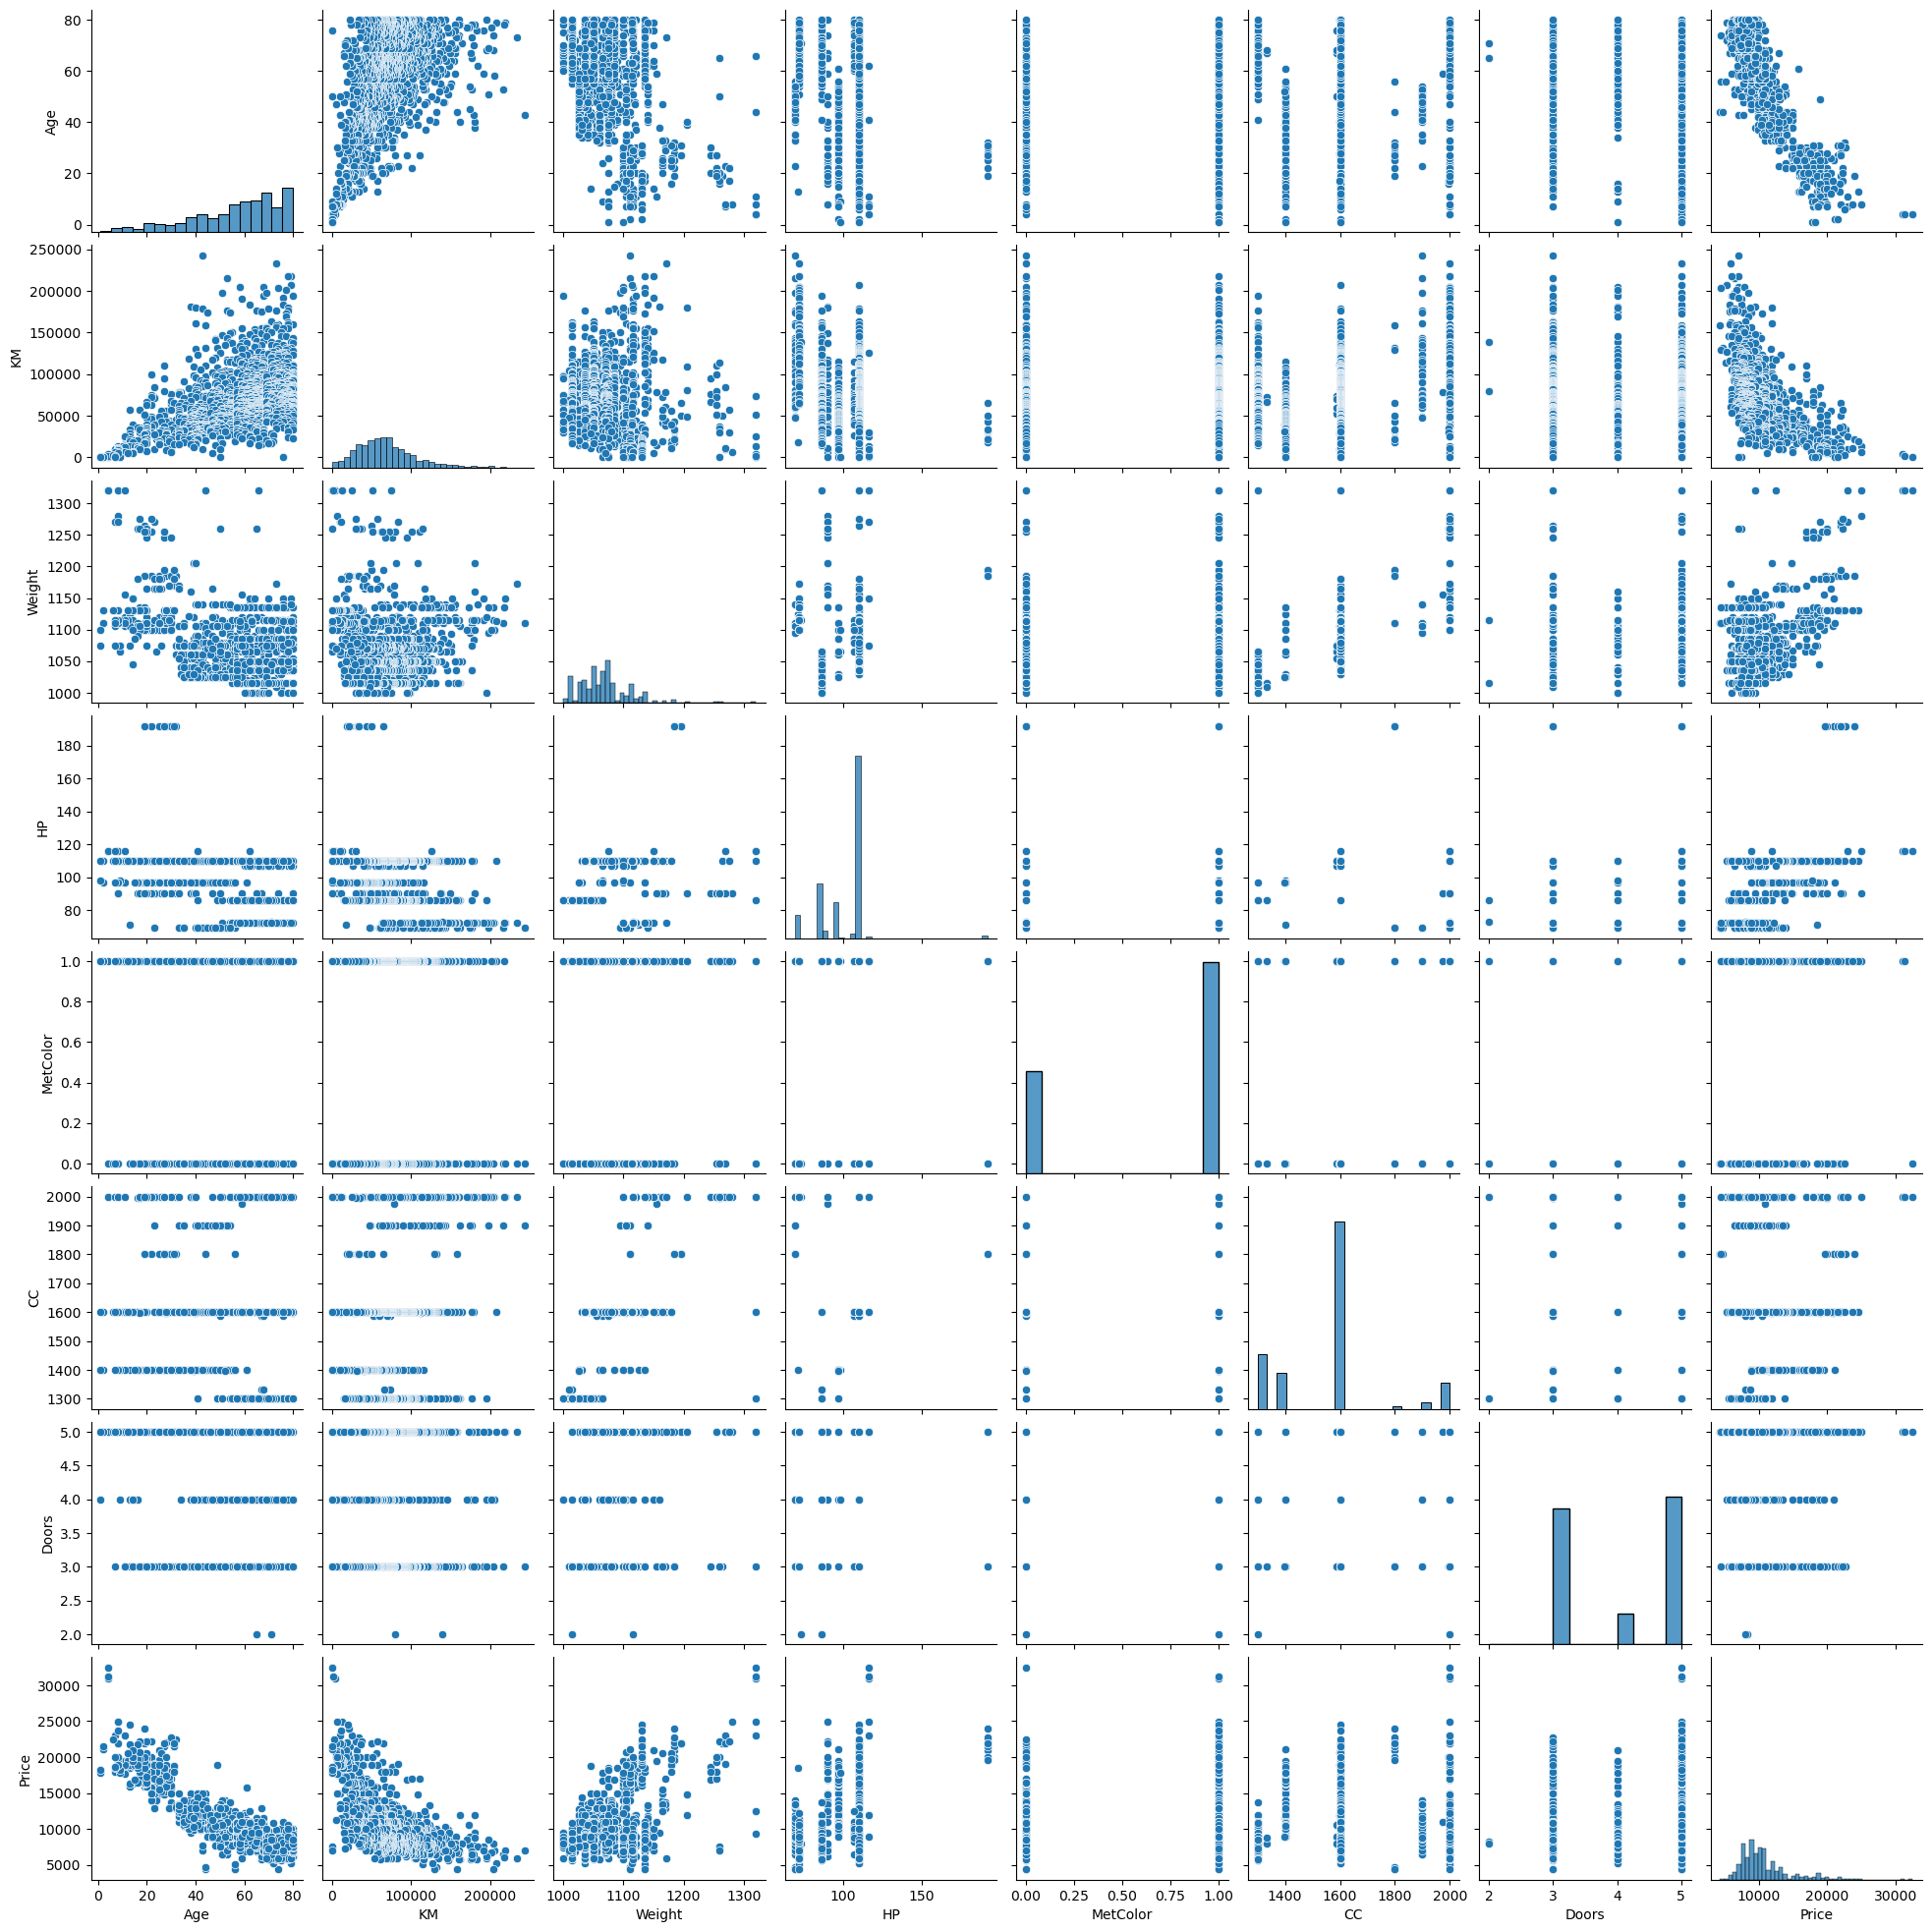

In [6]:
sns.pairplot(df)

<AxesSubplot:>

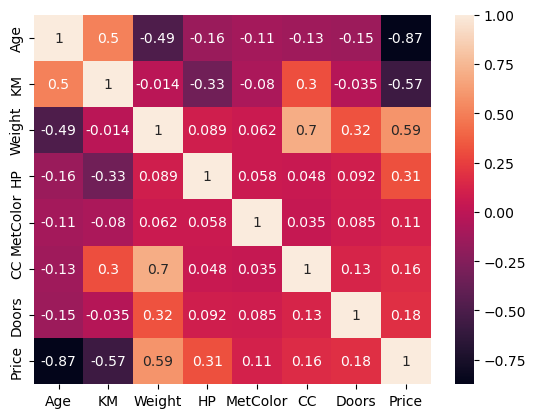

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
df.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1435 non-null   float64
 1   KM        1435 non-null   int64  
 2   Weight    1435 non-null   float64
 3   HP        1435 non-null   int64  
 4   MetColor  1435 non-null   int64  
 5   CC        1435 non-null   float64
 6   Doors     1435 non-null   int64  
 7   Price     1435 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 133.2 KB


In [15]:
df.describe().round(2)

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
count,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00
mean,56.03,68571.78,1071.66,101.49,0.67,1566.74,4.03,10720.92
std,18.53,37491.09,47.69,14.98,0.47,186.77,0.95,3608.73
min,1.00,1.00,1000.00,69.00,0.00,1300.00,2.00,4350.00
25%,44.00,43000.00,1040.00,90.00,0.00,1400.00,3.00,8450.00
50%,61.00,63451.00,1070.00,110.00,1.00,1600.00,4.00,9900.00
75%,70.00,87041.50,1085.00,110.00,1.00,1600.00,5.00,11950.00
max,80.00,243000.00,1320.00,192.00,1.00,2000.00,5.00,32500.00


{'whiskers': [<matplotlib.lines.Line2D at 0x1c28e14e760>,
 'caps': [<matplotlib.lines.Line2D at 0x1c28e14ed00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c28e14e310>,
 'medians': [<matplotlib.lines.Line2D at 0x1c28e150370>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c28e150700>,
 'means': []}

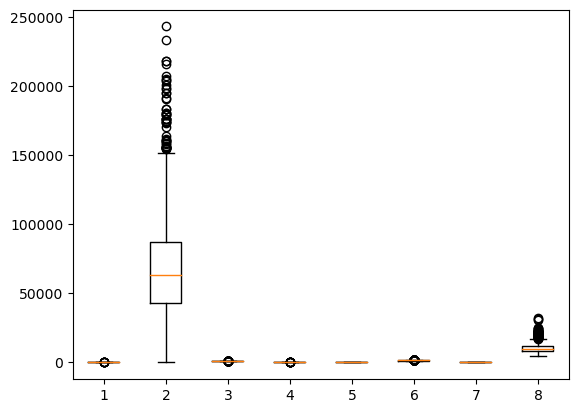

In [17]:
plt.boxplot(df)

In [18]:
df['Age'].isna().sum()

0

In [22]:
df['Age'].duplicated().sum()

1358

C:\Users\Sarah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Price'>

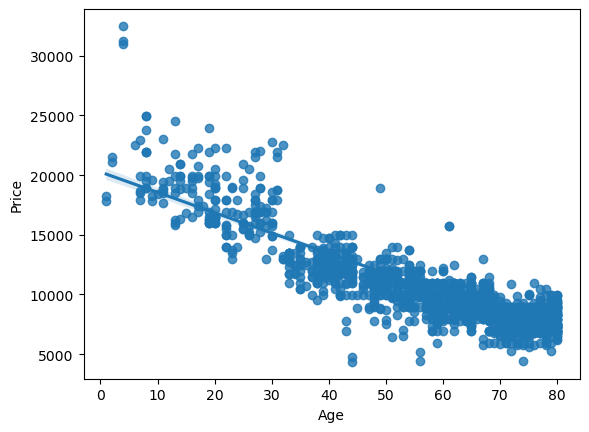

In [66]:
sns.regplot('Age','Price',df)

<AxesSubplot:>

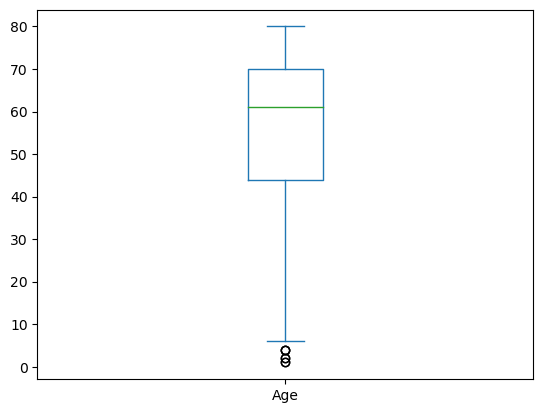

In [73]:
df['Age'].plot.box()

In [ ]:
#ouliers 
#q1=df['Age'].quantile(0.25)
#q3=df['Age'].quantile(0.75)
#iqr=q3-q1
#lower=q1-1.5*iqr
#highest=q3+1.5*iqr
#df_outlier=df[(df['Age']<=upper)&(df['Age']>=lower)]
#df['Age'].plot.box()


In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler=StandardScaler()

In [54]:
X=scaler.fit_transform(df[['Age']])

In [55]:
y=scaler.fit_transform(df[['Price']])

In [56]:
X

array([[-1.78270076],
       [-1.78270076],
       [-1.72872398],
       ...,
       [ 0.80818476],
       [ 0.75420798],
       [ 1.07806867]])

In [31]:
X.shape

(1435, 1)

In [32]:
y.shape

(1435, 1)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
LR=LinearRegression()

In [37]:
LR.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred_LR=LR.predict(X_test)

In [39]:
from sklearn.metrics import r2_score

In [41]:
print(r2_score(y_test,y_pred_LR))

0.7610665989753121


In [46]:
LR.predict(np.array(28).reshape(1,-1))

array([[-24.2011535]])

In [45]:
df.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750


In [48]:
LR.predict(scaler.fit_transform([[28]]))

array([[-0.00475846]])

In [60]:
scaler.inverse_transform(LR.predict(scaler.transform([[23]])))

C:\Users\Sarah\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[19948.4279921]])

In [64]:
from sklearn.metrics import mean_absolute_error

In [65]:
mean_absolute_error(y_test,y_pred_LR)

0.334314295867406

In [74]:
df

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750
...,...,...,...,...,...,...,...,...
1431,69.0,20544,1025.0,86,1,1300.0,3,7500
1432,72.0,19000,1015.0,86,0,1300.0,3,10845
1433,71.0,17016,1015.0,86,0,1300.0,3,8500
1434,70.0,16916,1015.0,86,1,1300.0,3,7250


In [76]:
X=df.drop('Price',axis=1)

In [83]:
y=df['Price']

In [85]:
y.values

array([13500, 13750, 13950, ...,  8500,  7250,  6950], dtype=int64)

In [86]:
#preprocessing
from sklearn.preprocessing import StandardScaler

In [80]:
ss=StandardScaler()

In [81]:
X=ss.fit_transform(X)

In [88]:
y=ss.fit_transform(y.values.reshape(-1,1))

In [89]:
#splitting
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [91]:
#building the model
from sklearn.linear_model import LinearRegression

In [92]:
lr=LinearRegression()

In [93]:
lr.fit(X_train,y_train)

LinearRegression()

In [94]:
y_pred_lr=lr.predict(X_test)

In [95]:
#evaluation
mean_absolute_error(y_test,y_pred_lr)

0.27015206651390467

In [96]:
print(r2_score(y_test,y_pred_lr))

0.8598931989930465


In [99]:
#predict a new data
scaler.inverse_transform(lr.predict(ss.fit_transform([[23,40000,1015,90,1,1600,5]])))

array([[10732.57273325]])

In [102]:
sns.load_dataset('tips')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [107]:
from sklearn.datasets import load_boston


In [109]:
from sklearn.datasets import fetch_california_housing

In [110]:
house=fetch_california_housing()

In [111]:
house

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [114]:
print(house.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [116]:
X,y= fetch_california_housing(return_X_y=True)

In [120]:
#Creating a dataframe
df=pd.DataFrame(X,columns=house.feature_names)

In [121]:
df['Target']=y

In [122]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
